In [33]:
# Written by Herman van Haagen. https://www.linkedin.com/in/hermanvanhaagen/

# Neural network backpropagation using the MNIST dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Functions
First we are going to define a couple of functions. These functions make the main code (neural network) more readable. 

In [35]:
# the onehone encoding function. For instance a 2 becomes [0,0,1,0,0,0,0,0,0,0]
def onehotencoding(x):
    onehot = np.zeros(10)
    onehot[x] = 1
    onehot = onehot[:,np.newaxis]
    return onehot

In [36]:
# The softmax activation function
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y

In [37]:
def selectInstance(dataset, index):
    # For stochastic gradient descent select one instance at a time. 
    # also the original data is in the range [0,255]. 
    # This needs to be scaled between [0,1]
    X = dataset[index,:]
    X = X[:,np.newaxis]
    X = X/255
    return X

### Loading the data
We are going to load the MNIST dataset https://www.kaggle.com/datasets/oddrationale/mnist-in-csv. Download this dataset first. 

In [38]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [39]:
# Check for convenience the data if it is correct
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [40]:
# We are going to put the labels and the data in separate variables
train = np.array(train)
test = np.array(test)

train_images = train[:, 1:785]
train_labels = train[:, 0]

test_images = test[:, 1:785]
test_labels = test[:, 0]

3


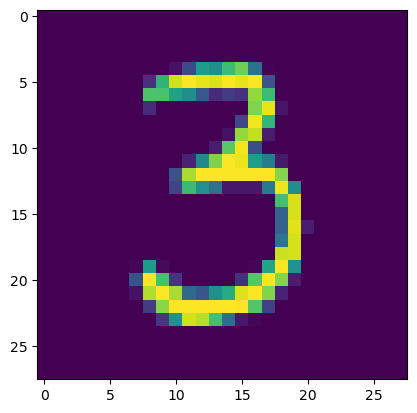

In [41]:
# Check for convenience if an instance of the data represents a handwritten digit. 
index = 50
cijfer = train_images[index, :]
w = cijfer.reshape(28,28)
plt.imshow(w)
print(train_labels[index])

### Training the neural network
For training the neural network we first have to initialize weights and bias. 
We make use of matrix notation. Pay special attention to the softmax function and its derivative which is very simple. Also pay special attention to the transpose of the vector X. This is needed to get the dimensions right during matrix multiplication. 

In [42]:
# initialize the weights and the bias
W = np.random.rand(10,784)
B = np.random.rand(10,1)

In [43]:
lr = 0.01 # learning rate
epochs = 10

In [44]:
for epoch in range(epochs):
    print('epoch: '+str(epoch))
    for k in range(60000):
        
        # Forward pass
        X = selectInstance(train_images, k )
        z = np.matmul(W,X) + B
        y = softmax(z)
        
        # Backpropagation
        label = train_labels[k]
        onehot = onehotencoding(label)
        error = (y-onehot) # the nice derivative of the softmax
        
        deltaW = np.matmul(error,np.transpose(X))
        deltaB = error
        
        # update rules
        W = W - lr*deltaW
        B = B - lr*deltaB

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19


### Validate the trained neural network on the testset

In [45]:
confusionmatrix = np.zeros([10, 10], dtype = int)

In [46]:
# Calculate the predictions on the test set
for k in range(10000):
    
    X = selectInstance(test_images, k )
    z = np.matmul(W,X) + B
    y = softmax(z)

    label = test_labels[k]
    onehot = onehotencoding(label)

    ind  = np.argmax(onehot)
    pred = np.argmax(y)
    confusionmatrix[pred, ind] = confusionmatrix[pred, ind] + 1

In [47]:
print(confusionmatrix)

[[ 963    0    8    5    1    8   11    1    8    7]
 [   0 1117   23    1    3    2    3   12   17    8]
 [   1    3  883   13    5    1    7   22    5    1]
 [   2    1   43  922    2   30    2   12   43   10]
 [   0    1    9    0  893    6    6    9    8   13]
 [   8    2    6   36    0  805   35    3   59    7]
 [   3    3   12    1    9    9  891    0   10    0]
 [   2    1    5   10    1    3    2  895    5    9]
 [   1    7   35   11    8   21    1    2  802    5]
 [   0    0    8   11   60    7    0   72   17  949]]


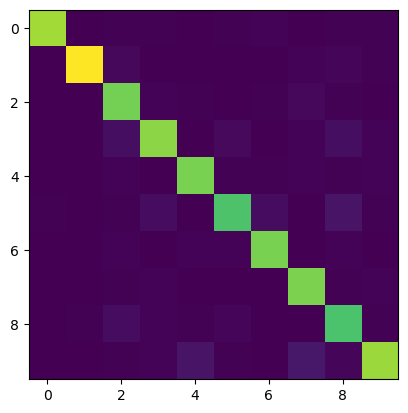

In [48]:
plt.imshow(confusionmatrix)

In [49]:
# calculate the accuracy from the confusion matrix
np.sum(confusionmatrix*np.identity(10))/np.sum(confusionmatrix)

0.912